In [1]:
%load_ext autotime

In [2]:
import imp # need to be done for python 3
import logging
imp.reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', 
                    level=logging.DEBUG, datefmt='%I:%M:%S')

time: 6.8 ms


In [3]:
import sys
import os

time: 821 µs


In [4]:
sys.path.append('/Users/pradap/Documents/Research/Python-Package/anhaid/magellan/')

time: 759 µs


In [5]:
import magellan as mg

time: 2.45 s


In [6]:
path_a = os.sep.join(['data', 'DBLP_demo.csv'])
path_b = os.sep.join(['data', 'ACM_demo.csv'])
path_c = os.sep.join(['data', 'dblp_acm_demo_labels.csv'])

time: 2.07 ms


In [7]:
A = mg.read_csv_metadata(path_a, key='id')
B = mg.read_csv_metadata(path_b, key='id')
C = mg.read_csv_metadata(path_c, key='_id', ltable=A, rtable=B, fk_ltable='ltable.id', 
                        fk_rtable='rtable.id')

10:27:05 WARNING:Metadata file is not present in the given path; proceeding to read the csv file.
10:27:05 WARNING:Metadata file is not present in the given path; proceeding to read the csv file.
10:27:05 WARNING:Metadata file is not present in the given path; proceeding to read the csv file.


time: 20.6 ms


In [8]:
feature_table = mg.get_features_for_matching(A, B)

10:27:23 WARNING:Magellan types: id type (str_eq_1w) and id type (numeric) are different.If you want to set them to be same and generate features, update output from get_attr_types and use get_features command.

10:27:24 WARNING:Magellan types: venue type (str_bt_1w_5w) and venue type (str_bt_5w_10w) are different.If you want to set them to be same and generate features, update output from get_attr_types and use get_features command.



time: 51.3 ms


In [10]:
feature_vectors = mg.extract_feature_vecs(C, feature_table=feature_table,
                                         attrs_after='gold')

10:27:57 INFO:Required metadata: cand.set key, fk ltable, fk rtable, ltable, rtable, ltable key, rtable key
10:27:57 INFO:Getting metadata from the catalog
10:27:57 INFO:..... Done
10:27:57 INFO:Validating candset key: _id
10:27:57 INFO:..... Done
10:27:57 INFO:Validating foreign key constraint for left table
10:27:57 INFO:..... Done
10:27:57 INFO:Validating foreign key constraint for right table
10:27:57 INFO:..... Done


time: 986 ms


In [11]:
dt = mg.DTMatcher()
rf = mg.RFMatcher()

time: 1.15 ms


In [15]:
feature_vectors.fillna(0, inplace=True)

time: 119 ms


In [16]:
train_test = mg.train_test_split(feature_vectors)
train = train_test['train']
test = train_test['test']

10:31:07 INFO:Required metadata: cand.set key, fk ltable, fk rtable, ltable, rtable, ltable key, rtable key
10:31:07 INFO:Getting metadata from the catalog
10:31:07 INFO:..... Done
10:31:07 INFO:Validating candset key: _id
10:31:07 INFO:..... Done
10:31:07 INFO:Validating foreign key constraint for left table
10:31:07 INFO:..... Done
10:31:07 INFO:Validating foreign key constraint for right table
10:31:07 INFO:..... Done


time: 17.6 ms


In [17]:
mg.vis_debug_rf(rf, train, test, 
                exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
               target_attr='gold')

time: 31.2 s


In [18]:
mg.vis_debug_dt(dt, train, test, 
                exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'],
               target_attr='gold')

time: 15.5 s


In [21]:
help(mg.visualize_tree)

Help on function visualize_tree in module magellan.debugmatcher.debug_decisiontree_matcher:

visualize_tree(decision_tree, table_columns, exclude_attrs=None)
    This function is used to visualize the decision tree learned from the
    training data using the 'fit' method.
    
    Note that, this function does not pop up a visualization of a decision tree.
    It creates a png file in the local directory and the user has to
    explicitly open the file to view the tree. More over, this function uses
    'dot'  command and graphviz to create the
    visualization. It is assumed that the 'dot' command is present and
    graphviz is installed in the local machine, which this function is executed.
    
    Args:
        decision_tree (DTMatcher or DecisionTreeClassifier): The decision tree
            matcher for which the visualization needs to be generated.
        table_columns (list): Attributes that were
            from the input table that was used to train the decision tree.
     

In [23]:
mg.visualize_tree(dt, feature_vectors.columns, 
                  exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 
time: 493 ms


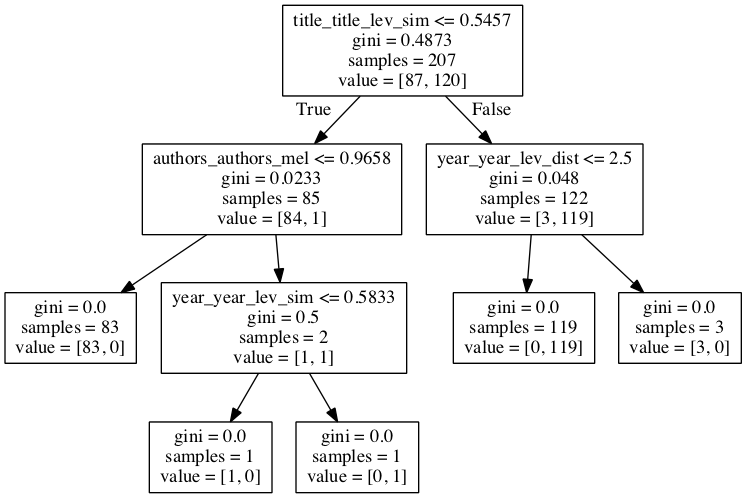

time: 19 ms


In [24]:
from IPython.display import Image
Image(filename='dt_.png') 

In [25]:
help(mg.vis_tuple_debug_dt_matcher)

Help on function vis_tuple_debug_dt_matcher in module magellan.debugmatcher.debug_gui_decisiontree_matcher:

vis_tuple_debug_dt_matcher(matcher, t, exclude_attrs)
    Visualize a matcher debugging a tuple.

time: 1.16 ms


In [26]:
help(mg.debug_decisiontree_matcher)

Help on function debug_decisiontree_matcher in module magellan.debugmatcher.debug_decisiontree_matcher:

debug_decisiontree_matcher(decision_tree, tuple_1, tuple_2, feature_table, table_columns, exclude_attrs=None)
    This function is used to debug a tree, using two input tuples.
    Specifically, this function takes in two tuples, gets the feature vector
    using the feature table and finally passes it to the decision tree and
    displays the path that the feature vector takes in the decision tree.
    Args:
        decision_tree (DTMatcher or Decision Tree Classifier): The input
            decision tree object that should be debugged.
        tuple_1, tuple_2 (Series): Input tuples that should be debugged.
        feature_table (DataFrame): Feature table containing the functions
            for the features.
        table_columns (list): List of all columns that will be outputted
            after generation of feature vectors.
        exclude_attrs (list): List of attributes tha

In [27]:
mg.debug_decisiontree_matcher(dt, A.ix[1], B.ix[2], feature_table, feature_vectors.columns, 
                             exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])

    title_title_lev_sim <= 0.545714259148 is False (  value : 0.9066666666666666)
    year_year_lev_dist <= 2.5 is True (  value : 2)
Match status : True
time: 5.9 ms


In [28]:
mg.debug_randomforest_matcher(rf, A.ix[1], B.ix[2], feature_table, feature_vectors.columns, 
                             exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold'])

Summary: Num trees = 10; Mean Prob. for non-match = 0.0; Mean Prob for match = 1.0; Match status =  True

Tree 1
    title_title_lev_sim <= 0.449342131615 is False (  value : 0.9066666666666666)
    year_year_lev_dist <= 2.5 is True (  value : 2)
    Prob. for non-match : 0.0
    Prob for match : 1.0

Tree 2
    title_title_lev_dist <= 18.5 is True (  value : 7)
    year_year_lev_dist <= 2.5 is True (  value : 2)
    Prob. for non-match : 0.0
    Prob for match : 1.0

Tree 3
    title_title_lev_sim <= 0.560000002384 is False (  value : 0.9066666666666666)
    authors_authors_mel <= 0.484920650721 is False (  value : 0.7264027437940482)
    Prob. for non-match : 0.0
    Prob for match : 1.0

Tree 4
    title_title_jac_qgm_3_qgm_3 <= 0.39411765337 is False (  value : 0.5851063829787234)
    year_year_lev_sim <= 0.58333337307 is False (  value : 0.6666666666666667)
    Prob. for non-match : 0.0
    Prob for match : 1.0

Tree 5
    title_title_lev_sim <= 0.545714259148 is False (  value : 